In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DATA_DIRECTORY = "../data"
DATA_FILE = "stencil_starpu_energy.csv"

In [3]:
df = pd.read_csv(DATA_DIRECTORY + '/' + DATA_FILE, sep=',').drop(columns=['nb_repeat']);df

,kernel,nb_partitions,mesh_size,cores,dram
0,stencil,1,512,464.2144,76.8095
1,stencil,1,1024,1824.1743,282.8423
2,stencil,1,2048,16414.1262,2982.9480
3,stencil,1,4096,111405.5628,21322.1580
4,stencil_starpu,2,512,369.5921,74.4548
5,stencil_starpu,4,512,352.2473,66.9779
6,stencil_starpu,8,512,336.8567,66.7091
7,stencil_starpu,16,512,390.8108,70.5432
8,stencil_starpu,32,512,508.8583,85.8111
9,stencil_starpu,64,512,785.9684,107.6033


In [11]:
df_ref_cores = df[df['kernel'] == 'stencil'].drop(columns=['dram'])
df_ref_cores = df_ref_cores.groupby(['kernel','mesh_size','nb_partitions'])['cores'].median().reset_index()
df_ref_dram = df[df['kernel'] == 'stencil'].drop(columns=['cores'])
df_ref_dram = df_ref_dram.groupby(['kernel','mesh_size','nb_partitions'])['dram'].median().reset_index()

In [12]:
df_test_cores = df[df['kernel'] != 'stencil'].drop(columns=['dram'])
df_test_cores = df_test_cores.groupby(['kernel','mesh_size', 'nb_partitions'])['cores'].median().reset_index()
df_test_dram = df[df['kernel'] != 'stencil'].drop(columns=['cores'])
df_test_dram = df_test_dram.groupby(['kernel','mesh_size', 'nb_partitions'])['dram'].median().reset_index()

In [13]:
df_merged_cores = pd.merge(df_test_cores, df_ref_cores[['mesh_size', 'cores', 'nb_partitions']], on=['mesh_size'], how='left', suffixes=('', '_ref'))
df_merged_dram = pd.merge(df_test_dram, df_ref_dram[['mesh_size', 'dram', 'nb_partitions']], on=['mesh_size'], how='left', suffixes=('', '_ref'));df_merged_dram

,kernel,mesh_size,nb_partitions,dram,dram_ref,nb_partitions_ref
0,stencil_starpu,512,2,74.4548,76.8095,1
1,stencil_starpu,512,4,66.9779,76.8095,1
2,stencil_starpu,512,8,66.7091,76.8095,1
3,stencil_starpu,512,16,70.5432,76.8095,1
4,stencil_starpu,512,32,85.8111,76.8095,1
5,stencil_starpu,512,64,107.6033,76.8095,1
6,stencil_starpu,512,128,148.3702,76.8095,1
7,stencil_starpu,512,256,232.2397,76.8095,1
8,stencil_starpu,512,510,377.9678,76.8095,1
9,stencil_starpu,1024,2,276.3483,282.8423,1


In [14]:
df_merged_cores['speedup'] = df_merged_cores['cores_ref'] / df_merged_cores['cores']
df_merged_dram['speedup'] = df_merged_dram['dram_ref'] / df_merged_dram['dram']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


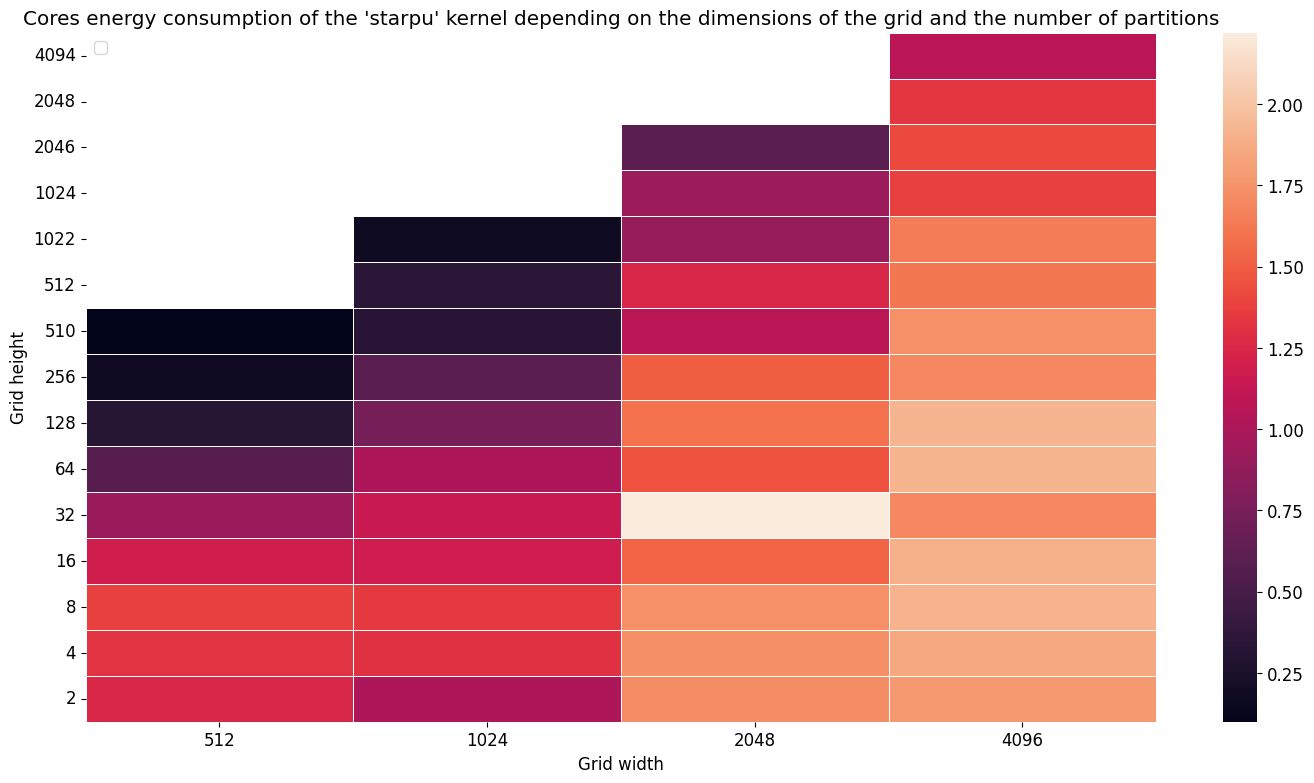

In [21]:
heatmap_cores = pd.pivot_table(df_merged_cores, values='speedup', index='nb_partitions', columns=['mesh_size'])
fig, ax = plt.subplots(figsize=(14.5,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(heatmap_cores, annot=False, linewidths=.5, ax=ax)
ax.invert_yaxis()
plt.legend(loc='upper left')
plt.title("Cores energy consumption of the 'starpu' kernel depending on the dimensions of the grid and the number of partitions")
plt.tight_layout()
plt.xlabel('Grid width')
plt.ylabel('Grid height')
plt.savefig("../plots/stencil_avx2/starpu_energy_cores.png", format='png')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


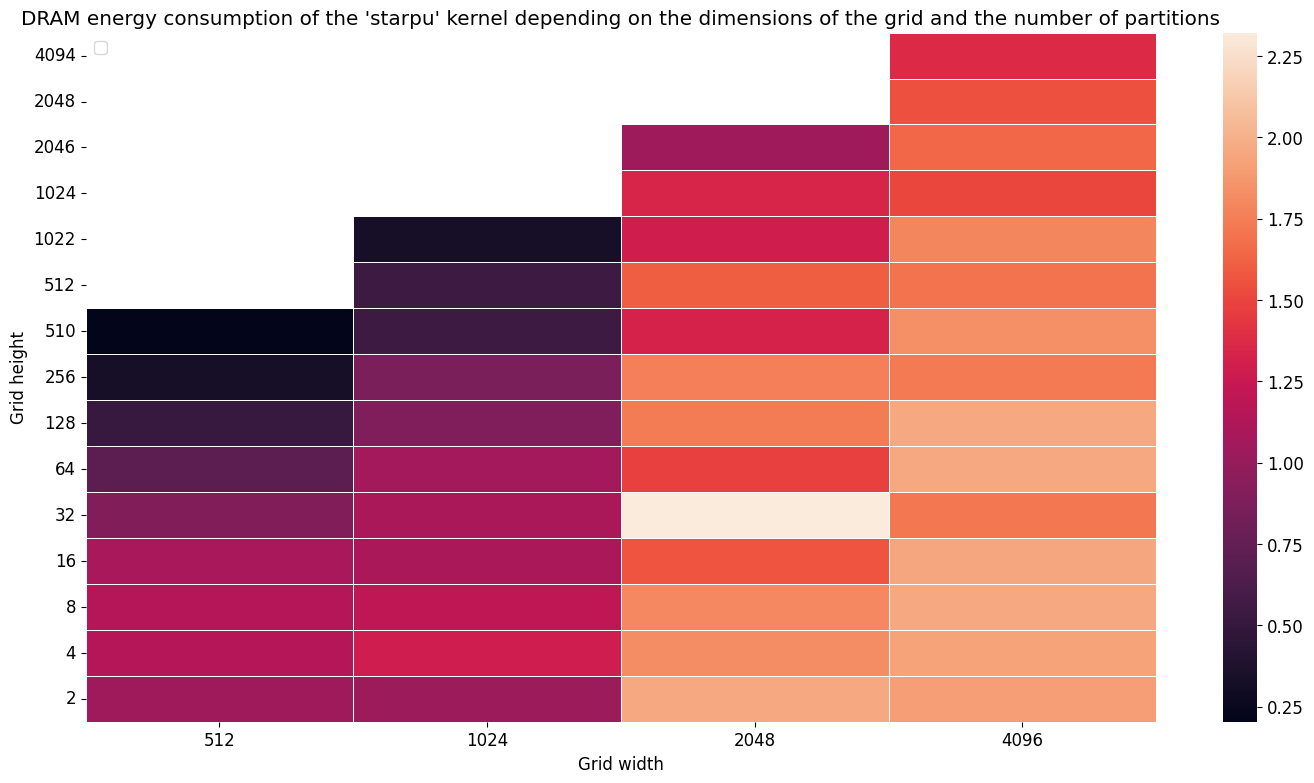

In [20]:
heatmap_dram = pd.pivot_table(df_merged_dram, values='speedup', index='nb_partitions', columns=['mesh_size'])
fig, ax = plt.subplots(figsize=(14.5,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(heatmap_dram, annot=False, linewidths=.5, ax=ax)
ax.invert_yaxis()
plt.legend(loc='upper left')
plt.title("DRAM energy consumption of the 'starpu' kernel depending on the dimensions of the grid and the number of partitions")
plt.tight_layout()
plt.xlabel('Grid width')
plt.ylabel('Grid height')
plt.savefig("../plots/stencil_avx2/starpu_energy_dram.png", format='png')
plt.show()